#### Importando as bibliotecas

In [22]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
import yfinance as yf
import numpy as np

#### Definindo as Datas

In [23]:
data_inicio= "2024-09-01"
data_final = "2025-02-01"

#### Escolhendo os Criptoativos e baixando seus dados

In [24]:
ativos_cripto = ["BTC-USD","ETH-USD","LTC-USD","XRP-USD","BNB-USD"]

#Nota-se que coloquei somente a coluna de "Fechamneto ajustado"
cripto = yf.download(tickers=ativos_cripto,start=data_inicio,end=data_final)["Adj Close"]

#Coloque a coluna de data como index
cripto.index = cripto.index.date

[*********************100%***********************]  5 of 5 completed


#### Calculando retornos diários

In [25]:
#Utilizando a função pct_change() , na qual calcula a variação percentual diária e o dropna() para tirar o dados faltantes
#Como pega o dia anterior como parâmetro sempre a 1° linha fica com "Dados Flatantes"
retorno_cripto = cripto.pct_change().dropna()*100

#Colocando o index no formato de DateTime
retorno_cripto.index = pd.to_datetime(retorno_cripto.index)
retorno_cripto

Ticker,BNB-USD,BTC-USD,ETH-USD,LTC-USD,XRP-USD
2024-09-02,2.700670,3.117273,4.542395,2.806171,3.576159
2024-09-03,-1.475913,-2.844504,-4.632578,-1.357133,-1.796382
2024-09-04,-2.091594,0.941156,1.172158,1.559508,0.140833
2024-09-05,-1.132512,-3.124034,-3.317283,1.001470,-2.504581
2024-09-06,-3.020823,-3.938239,-6.075888,-4.661704,-4.198675
...,...,...,...,...,...
2025-01-27,1.954146,-0.579273,-1.767970,-1.969093,0.890780
2025-01-28,-2.702112,-0.739767,-3.202592,-4.071998,0.259894
2025-01-29,0.946619,2.339560,1.166239,4.963078,0.234359
2025-01-30,1.477920,0.995238,4.329619,12.292568,2.045922


#### Adotando pesos para os criptoativos

In [26]:
pesos = pd.Series([0.1, 0.4, 0.3, 0.1, 0.1], index=retorno_cripto.columns)

#### Calculando o retorno da Carteira

In [27]:
#Criamos uma coluna nova e fizemos a multiplicação escalar dos pesos x Retornos
retorno_cripto["Retorno"] = retorno_cripto.dot(pesos)
retorno_cripto["Retorno"]


2024-09-02    3.517928
2024-09-03   -2.990518
2024-09-04    0.688985
2024-09-05   -2.508361
2024-09-06   -4.586182
                ...   
2025-01-27   -0.674517
2025-01-28   -1.908106
2025-01-29    1.900101
2025-01-30    3.278622
2025-01-31   -0.877905
Name: Retorno, Length: 152, dtype: float64

#### Calculando o retorno acumulado

In [28]:
retorno_acumulado = (1 + retorno_cripto["Retorno"]/100).cumprod()

#### Lendo dados de um arquivo local no computador

In [29]:
dados = rlocal do arquivo"

#### Extraindo os dados do Arquivo e manipulando-os para melhor manipulação
Como não consguimos extrair os dados da biblioteca Yfinance baixamos o arquivo CSV do Índice Nasdaq Crypto Index
do site https://br.investing.com/

In [30]:
#Lendo o arquivo CSV
nasdaq_crypto_index = pd.read_csv(dados)

#Filtrando as colunas 
nasdaq_crypto_index = nasdaq_crypto_index[["Data","Último"]]

#Mudando o nome das colunas
nasdaq_crypto_index.rename(columns={"Último": "Fechamento"}, inplace=True)

#Colocando a Coluna DATA no formato de DateTime
nasdaq_crypto_index["Data"] = pd.to_datetime(nasdaq_crypto_index["Data"], dayfirst=True, errors="coerce")

#Colocando a coluna DATA como INDEX
nasdaq_crypto_index.set_index("Data", inplace=True)

#Ordenando para uma ordem crescente
nasdaq_crypto_index.sort_index(ascending=True, inplace=True)
nasdaq_crypto_index

,Fechamento
Data,
2024-09-03,"2.979,4"
2024-09-04,"2.981,4"
2024-09-05,"2.881,4"
2024-09-06,"2.741,6"
2024-09-09,"2.940,0"
...,...
2025-01-27,"5.276,8"
2025-01-28,"5.194,2"
2025-01-29,"5.335,6"


#### Removendo alguns parâmetros

In [31]:
# Neste ponto os valores estão neste formato(5.316,2) e prcisamos colocar neste → (5316,2)
nasdaq_crypto_index["Fechamento"] = (
    nasdaq_crypto_index["Fechamento"]
    .str.replace('.', '', regex=False)    # Remove pontos (ex: 5.316,2 → 5316,2)
    .str.replace(',', '.', regex=False)   # Substitui vírgula por ponto (ex: 5316,2 → 5316.2)
    .astype(float)                        # Converte para float
)

#### Calculando o Retorno DIÁRIO e o ACUMULADO do índice 

In [32]:
nasdaq_crypto_retorno = nasdaq_crypto_index["Fechamento"].pct_change().dropna()*100
retorno_acumulado_nasdaq = (1 + nasdaq_crypto_retorno / 100).cumprod()
retorno_acumulado_nasdaq

Data
2024-09-04    1.000671
2024-09-05    0.967107
2024-09-06    0.920185
2024-09-09    0.986776
2024-09-10    0.990233
                ...   
2025-01-27    1.771095
2025-01-28    1.743371
2025-01-29    1.790830
2025-01-30    1.827146
2025-01-31    1.784319
Name: Fechamento, Length: 104, dtype: float64

#### Vamos ajustar os dados para que o gráfico comece em 0%, facilitando a visualização dos ganhos acima de 0 e das perdas abaixo.

In [33]:
retorno_acumulado = (retorno_acumulado - 1) * 100
retorno_acumulado_nasdaq = (retorno_acumulado_nasdaq - 1) * 100

#### Rentebilidade final 

In [34]:
rentabilidade_carteira = retorno_acumulado[-1]  # Já está em percentual
rentabilidade_nasdaq = retorno_acumulado_nasdaq[-1]  # Já está em percentual


#### Plotando o Gráfico

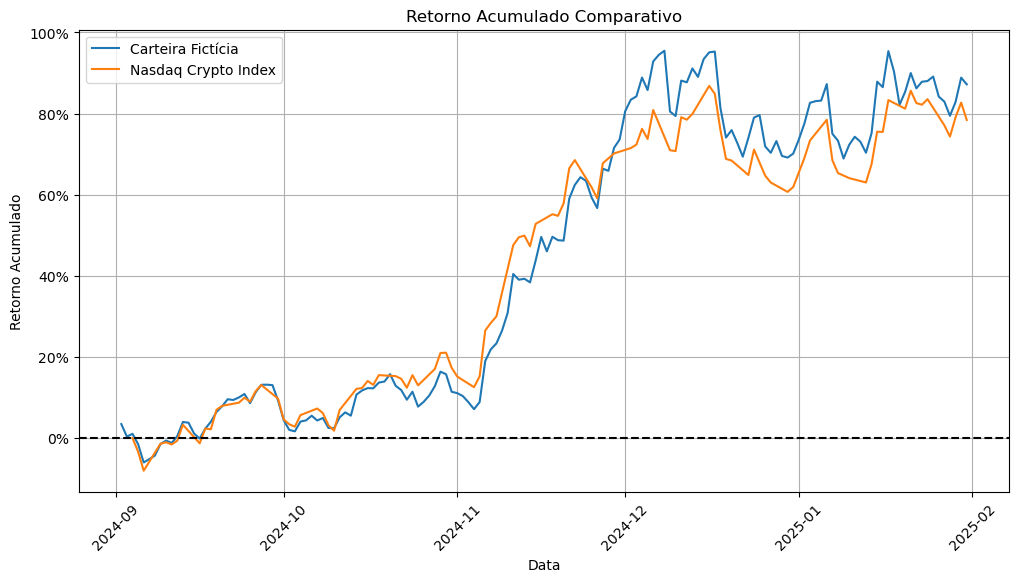

In [35]:
#Ajusta tamanho 
plt.figure(figsize=(12,6))
#fazendo o primeiro gráfico de linha
plt.plot(retorno_acumulado, label="Carteira Fictícia")
#fazendo o segundo gráfico de linha
plt.plot(retorno_acumulado_nasdaq, label="Nasdaq Crypto Index")
#Colocando um Titulo
plt.title("Retorno Acumulado Comparativo")
#Colocando subtitulo no eixo y
plt.ylabel("Retorno Acumulado")
#Colocando uma linha "tracejada" no eixo X
plt.axhline(0, linestyle="--",color='black')
#Colocando subtitulo no eixo x
plt.xlabel("Data")
#Adicionando Legenda
plt.legend()
#Colocando a legenda "De lado" no angulo de 45°
plt.xticks(rotation=45)
#Colocando os valores do eixo y em %
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
#Colocando uma grade
plt.grid()

In [38]:
investimento_inicial = float(input("Digite o valor inicial do seu investimento: R$ "))
saldo_final_carteira = investimento_inicial * (1 + rentabilidade_carteira / 100)
saldo_final_nasdaq = investimento_inicial * (1 + rentabilidade_nasdaq / 100)

texto = """
A Carteira Fictícia fechou o período com uma rentabilidade acumulada de {:.2f}% vs. {:.2f}% do Nasdaq Crypto Index.

Se você tivesse investido R${:.2f} na carteira fictícia, teria R${:.2f} no final do período.
Se tivesse investido no Nasdaq Crypto Index, teria R${:.2f}.
""".format(rentabilidade_carteira, rentabilidade_nasdaq, investimento_inicial, saldo_final_carteira, saldo_final_nasdaq)

print(texto)


Digite o valor inicial do seu investimento: R$ 100

A Carteira Fictícia fechou o período com uma rentabilidade acumulada de 87.21% vs. 78.43% do Nasdaq Crypto Index.

Se você tivesse investido R$100.00 na carteira fictícia, teria R$187.21 no final do período.
Se tivesse investido no Nasdaq Crypto Index, teria R$178.43.

